## 37:「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ

In [1]:
from collections import defaultdict,Counter
import collections
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
with open('./neko.txt.mecab','r') as f:
  text_dict = []
  sentence_dict = []
  # f.read:改行も含めた文字列
  # f.readlines:改行コードを区切って１行ごとに分解されたリスト
  for line in f.readlines():
    if line == '\n':
      continue
    # １文
    elif line != 'EOS\n':
      node = line.split('\t')
      # surfaceが空白の場合除外
      if node[0] == '':
        continue
      # surface 以外はnode[1]
      feature = node[1].split(',')
      word_dict = {
        "surface":node[0],
        "base":feature[6],
        "pos":feature[0],
        "pos1":feature[1]
      }
      sentence_dict.append(word_dict)
    # 追加
    # 追加文が無い場合は除外(elseだと、つまり無い場合も追加したら9210→9964)
    elif len(sentence_dict) != 0:
      text_dict.append(sentence_dict)
      sentence_dict = []

# 35 単語(surface?)とその出現頻度を高い順
import itertools
verb_dict = []
sentence_dict = itertools.chain.from_iterable(text_dict)


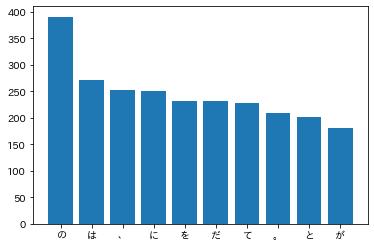

In [3]:
neko_cooc = Counter([])
for sentence in text_dict:
  words = [word['base'] for word in sentence]

  if "猫" in words:
    neko_cooc+= Counter(words)
neko_cooc = dict(neko_cooc.most_common()[:11])
neko_cooc.pop("猫")

plt.figure()
plt.bar(neko_cooc.keys(),neko_cooc.values())
plt.show()